Fecha de Inicio: 2023-11-01 12:43:00
Fecha de finalización: 2023-11-06 16:48


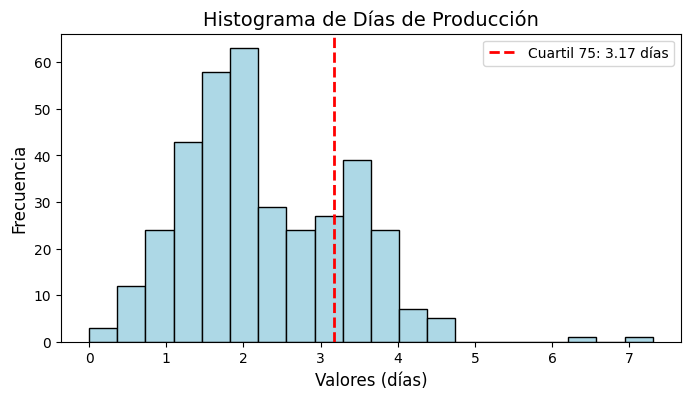

In [8]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import BDay, Hour
import matplotlib.pyplot as plt

# Abre el archivo .xlsx y lo guarda en un DataFrame
archivo_excel = 'C:/Users/schaf/Downloads/entregables/DATA_SIMULADOR.xlsx'
df_segunda_hoja = pd.read_excel(archivo_excel, sheet_name=1)

# Accede a la tercera columna (índice 2) y calcula el cuartil 75 en horas
tercera_columna = df_segunda_hoja.iloc[:, 2]
cuartil_75_horas = tercera_columna.quantile(0.75)

# Convierte el cuartil 75 de horas a días
cuartil_75_dias = cuartil_75_horas / 24

# Separa la parte entera y la parte fraccionaria de los días
dias_enteros = int(cuartil_75_dias)  # Parte entera
horas_restantes = (cuartil_75_dias - dias_enteros) * 24  # Parte fraccionaria convertida a horas

# Abre la primera solapa (índice 0) para obtener el valor de 'FechaInicio'
df_primera_hoja = pd.read_excel(archivo_excel, sheet_name=0)
fecha_inicio = pd.to_datetime(df_primera_hoja['Fecha Inicio'].iloc[0])
print(f"Fecha de Inicio: {fecha_inicio}")

# Sumar los días hábiles enteros a la fecha de inicio
fecha_intermedia = fecha_inicio + BDay(dias_enteros)

# Sumar las horas restantes a la fecha intermedia
fecha_final = fecha_intermedia + pd.DateOffset(hours=horas_restantes)

# Formatear la fecha final
fecha_final_formateada = fecha_final.strftime('%Y-%m-%d %H:%M')
print(f"Fecha de finalización: {fecha_final_formateada}")

# Convertir la tercera columna a días
tercera_columna_dias = tercera_columna / 24

plt.figure(figsize=(8, 4))
plt.hist(tercera_columna_dias, bins=20, color='lightblue', edgecolor='black')

# Añadir la línea del cuartil 75 en días
plt.axvline(cuartil_75_dias, color='red', linestyle='--', linewidth=2, label=f'Cuartil 75: {cuartil_75_dias:.2f} días')

# Añadir títulos y etiquetas
plt.title('Histograma de Días de Producción', fontsize=14)
plt.xlabel('Valores (días)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Añadir leyenda
plt.legend()

# Mostrar el histograma
plt.show()

